In [1]:
import numpy as np
import pandas as pd
import pickle
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score,roc_curve, auc, f1_score, precision_recall_curve, auc, log_loss
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


from numpy import mean
from numpy import std
from sklearn.model_selection import GridSearchCV

### Load Data

In [2]:
normal_data = pd.read_csv("final-normal-data-set.csv")
abnormal_data = pd.read_csv("final-anormal-data-set.csv")

C:\Users\New user\AppData\Local\Temp\ipykernel_19500\2464106790.py:2: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  abnormal_data = pd.read_csv("final-anormal-data-set.csv")


#### Assign Target Label

In [84]:
normal_data['target'] = 0
abnormal_data['target'] = 1

#### Combine Datasets

In [85]:
combined_df = pd.concat([normal_data, abnormal_data], ignore_index=True).sample(frac=1, random_state=42)
combined_df = combined_df.reset_index(drop =True)

In [86]:
combined_df.head(10)

,cpu_guest,cpu_guest_nice,cpu_idle,cpu_iowait,cpu_irq,cpu_nice,cpu_softirq,cpu_steal,cpu_system,cpu_total,...,processcount_thread,processcount_total,system_hostname,system_hr_name,system_linux_distro,system_os_name,system_os_version,system_platform,timestamp,target
0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,3.6,9.2,...,138.0,96.0,vm4-web-server,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-29 19:02:27,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,100.0,...,199.0,111.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-28 21:41:54,0
2,0.0,0.0,93.5,0.0,0.0,0.0,0.0,0.0,2.8,6.5,...,144.0,90.0,vm2-node,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-26 15:08:51,0
3,0.0,0.0,91.7,0.0,0.0,0.0,0.0,0.0,2.8,7.4,...,138.0,96.0,vm4-web-server,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-29 15:48:13,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,100.0,...,132.0,100.0,vm3-tomcat,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-28 19:43:25,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,100.0,...,135.0,103.0,vm3-tomcat,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-28 19:50:26,0
6,0.0,0.0,92.6,0.0,0.0,0.0,0.0,0.0,1.9,7.4,...,138.0,96.0,vm4-web-server,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-29 20:32:09,0
7,0.0,0.0,91.7,0.0,0.0,0.0,0.0,0.0,2.8,8.3,...,138.0,96.0,vm4-web-server,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-29 20:41:14,0
8,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,3.7,9.2,...,138.0,96.0,vm4-web-server,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-29 20:35:33,0
9,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,4.5,10.0,...,138.0,96.0,vm4-web-server,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-29 17:54:51,0


In [87]:
combined_df.columns

Index(['cpu_guest', 'cpu_guest_nice', 'cpu_idle', 'cpu_iowait', 'cpu_irq',
       'cpu_nice', 'cpu_softirq', 'cpu_steal', 'cpu_system', 'cpu_total',
       'cpu_user', 'diskio_sda1_disk_name', 'diskio_sda1_key',
       'diskio_sda1_read_bytes', 'diskio_sda1_time_since_update',
       'diskio_sda1_write_bytes', 'diskio_sda_disk_name', 'diskio_sda_key',
       'diskio_sda_read_bytes', 'diskio_sda_time_since_update',
       'diskio_sda_write_bytes', 'fs_/_device_name', 'fs_/_free',
       'fs_/_fs_type', 'fs_/_key', 'fs_/_mnt_point', 'fs_/_percent',
       'fs_/_size', 'fs_/_used', 'load_cpucore', 'load_min1', 'load_min15',
       'load_min5', 'mem_active', 'mem_available', 'mem_buffers', 'mem_cached',
       'mem_free', 'mem_inactive', 'mem_percent', 'mem_shared', 'mem_total',
       'mem_used', 'memswap_free', 'memswap_percent', 'memswap_sin',
       'memswap_sout', 'memswap_total', 'memswap_used',
       'network_lo_cumulative_cx', 'network_lo_cumulative_rx',
       'network_lo_cumulat

In [88]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95312 entries, 0 to 95311
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cpu_guest                      95311 non-null  float64
 1   cpu_guest_nice                 95311 non-null  float64
 2   cpu_idle                       95311 non-null  float64
 3   cpu_iowait                     95311 non-null  float64
 4   cpu_irq                        95310 non-null  float64
 5   cpu_nice                       95310 non-null  float64
 6   cpu_softirq                    95311 non-null  float64
 7   cpu_steal                      95310 non-null  float64
 8   cpu_system                     95311 non-null  float64
 9   cpu_total                      95310 non-null  float64
 10  cpu_user                       95311 non-null  float64
 11  diskio_sda1_disk_name          95312 non-null  object 
 12  diskio_sda1_key                95312 non-null 

In [89]:
#Shape of dataset
df_shape = combined_df.shape
print('Number of rows: {} \nNumber of Columns: {}'.format(df_shape[0], df_shape[1]))

Number of rows: 95312 
Number of Columns: 83


In [90]:
clases=combined_df["target"].value_counts(sort=True)
clases

0    80851
1    14461
Name: target, dtype: int64

### Data Preprocessing

##### Removing Irrelevant columns

In [91]:
threshold = 3
columns_to_remove = combined_df.columns[combined_df.nunique() <= threshold]
columns_to_exclude = ["target"]
columns_to_remove = [column for column in columns_to_remove if column not in columns_to_exclude]
combined_df.drop(columns_to_remove, inplace=True, axis=1)
combined_df.drop(["timestamp","system_hostname"], axis=1,inplace=True)

In [92]:
combined_df.head()

,cpu_idle,cpu_iowait,cpu_nice,cpu_softirq,cpu_system,cpu_total,cpu_user,diskio_sda1_read_bytes,diskio_sda1_time_since_update,diskio_sda1_write_bytes,...,percpu_0_nice,percpu_0_softirq,percpu_0_system,percpu_0_total,percpu_0_user,processcount_running,processcount_sleeping,processcount_thread,processcount_total,target
0,90.0,0.0,0.0,0.0,3.6,9.2,6.4,0.0,1.091864,0,...,0.0,0.0,2.8,9.2,6.4,2.0,94.0,138.0,96.0,0
1,0.0,0.0,0.0,0.0,3.4,100.0,96.6,0.0,1.467298,110592,...,0.0,0.0,4.8,100.0,95.2,2.0,109.0,199.0,111.0,0
2,93.5,0.0,0.0,0.0,2.8,6.5,3.7,0.0,1.076858,0,...,0.0,0.0,1.9,6.5,4.7,2.0,88.0,144.0,90.0,0
3,91.7,0.0,0.0,0.0,2.8,7.4,5.5,0.0,1.091703,0,...,0.0,0.0,2.7,9.1,6.4,2.0,94.0,138.0,96.0,0
4,0.0,0.0,0.0,0.0,2.5,100.0,97.5,0.0,1.189953,0,...,0.0,0.0,3.3,100.0,96.7,2.0,98.0,132.0,100.0,0


In [93]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95312 entries, 0 to 95311
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cpu_idle                       95311 non-null  float64
 1   cpu_iowait                     95311 non-null  float64
 2   cpu_nice                       95310 non-null  float64
 3   cpu_softirq                    95311 non-null  float64
 4   cpu_system                     95311 non-null  float64
 5   cpu_total                      95310 non-null  float64
 6   cpu_user                       95311 non-null  float64
 7   diskio_sda1_read_bytes         95312 non-null  float64
 8   diskio_sda1_time_since_update  95312 non-null  object 
 9   diskio_sda1_write_bytes        95312 non-null  int64  
 10  diskio_sda_read_bytes          95312 non-null  float64
 11  diskio_sda_time_since_update   95312 non-null  object 
 12  diskio_sda_write_bytes         95312 non-null 

In [94]:
#row_indices, col_indices = np.where(combined_df.applymap(lambda x: isinstance(x, str)))

# Display the row and column indices
#for row_idx, col_idx in zip(row_indices, col_indices):
#    print(f"String value found at row {row_idx}, column {col_idx}.")

##### Missing Values

In [95]:
list0 = []
for var in combined_df.columns:
    if (combined_df[var].isnull().sum()>0):
        list0.append(var)
len(list0)

20

In [96]:
for var in list0:
    combined_df = combined_df[~combined_df[var].isnull()] # dropping these rows

In [97]:
list0 = []
for var in combined_df.columns:
    if (combined_df[var].isnull().sum()>0):
        list0.append(var)
len(list0)

0

In [98]:
for column in combined_df.columns:
    if combined_df[column].dtype == object and column not in columns_to_exclude:
        combined_df[column] = combined_df[column].astype(float) # converting the remaining variables

#### Feature Assessment

In [99]:
cpu = [column for column in combined_df.columns if column[:3] == 'cpu' or column[3:6] == 'cpu']
mem = [column for column in combined_df.columns if column[:3] == 'mem']
diskio = [column for column in combined_df.columns if column[:6] == 'diskio']
network = [column for column in combined_df.columns if column[:7] == 'network']
load = [column for column in combined_df.columns if column[:4] == 'load']
processcount = [column for column in combined_df.columns if column[:3] == 'pro']
fs = [column for column in combined_df.columns if column not in cpu + mem + diskio + network + load + processcount and column != 'target']

In [100]:
def summary_stats(variables):
    stats = combined_df[variables].groupby(combined_df['target']).describe()
    for column in combined_df[variables]:
        print(f"Summary Statistics for '{column}':")
        print(stats[column])
        print()

##### load variables

In [101]:
summary_stats(load)

Summary Statistics for 'load_min1':
          count      mean       std   min   25%   50%   75%   max
target                                                           
0       80850.0  1.118901  1.283275  0.00  0.15  0.32  1.63  5.55
1       14460.0  3.234879  1.079211  0.96  1.92  3.71  4.02  5.23

Summary Statistics for 'load_min15':
          count      mean       std   min   25%   50%   75%   max
target                                                           
0       80850.0  1.083712  1.238133  0.05  0.20  0.23  1.50  3.52
1       14460.0  2.830480  1.135027  0.18  1.63  3.27  3.78  4.20

Summary Statistics for 'load_min5':
          count      mean       std   min   25%   50%   75%   max
target                                                           
0       80850.0  1.110632  1.261902  0.02  0.18  0.26  1.54  3.97
1       14460.0  3.124193  1.085940  0.42  1.82  3.73  4.03  4.51



#####  DiskIO variables

In [102]:
summary_stats(diskio)

Summary Statistics for 'diskio_sda1_read_bytes':
          count      mean          std  min  25%  50%  75%       max
target                                                              
0       80850.0  7.548596  1608.417607  0.0  0.0  0.0  0.0  454656.0
1       14460.0  0.000000     0.000000  0.0  0.0  0.0  0.0       0.0

Summary Statistics for 'diskio_sda1_time_since_update':
          count      mean       std     min       25%       50%       75%  \
target                                                                      
0       80850.0  1.161348  0.114805  1.0000  1.087813  1.092856  1.201133   
1       14460.0  1.169869  0.151879  0.6527  1.024256  1.230440  1.298407   

             max  
target            
0       1.723002  
1       2.127072  

Summary Statistics for 'diskio_sda1_write_bytes':
          count          mean            std  min  25%  50%  75%        max
target                                                                     
0       80850.0  22698.578009 

##### CPU variables

#### cpu_

In [103]:
summary_stats(cpu[:6])

Summary Statistics for 'cpu_idle':
          count       mean        std  min  25%   50%   75%   max
target                                                           
0       80850.0  58.968374  43.470446  0.0  0.0  90.8  91.7  94.3
1       14460.0   0.467109   5.553655  0.0  0.0   0.0   0.0  92.0

Summary Statistics for 'cpu_iowait':
          count      mean       std  min  25%  50%  75%  max
target                                                      
0       80850.0  0.003926  0.061901  0.0  0.0  0.0  0.0  3.6
1       14460.0  0.000041  0.004990  0.0  0.0  0.0  0.0  0.6

Summary Statistics for 'cpu_nice':
          count      mean       std  min  25%  50%  75%   max
target                                                       
0       80850.0  0.004220  0.505686  0.0  0.0  0.0  0.0  75.5
1       14460.0  0.003389  0.058115  0.0  0.0  0.0  0.0   1.0

Summary Statistics for 'cpu_softirq':
          count      mean       std  min  25%  50%  75%  max
target                             

#### percpu

In [104]:
summary_stats(cpu[7:])

Summary Statistics for 'percpu_0_idle':
          count       mean        std  min  25%   50%   75%   max
target                                                           
0       80850.0  58.929304  43.462637  0.0  0.0  90.8  91.7  94.3
1       14460.0   0.385124   5.690548  0.0  0.0   0.0   0.0  96.7

Summary Statistics for 'percpu_0_iowait':
          count      mean       std  min  25%  50%  75%   max
target                                                       
0       80850.0  0.004143  0.073766  0.0  0.0  0.0  0.0  10.0
1       14460.0  0.000069  0.008316  0.0  0.0  0.0  0.0   1.0

Summary Statistics for 'percpu_0_nice':
          count      mean       std  min  25%  50%  75%   max
target                                                       
0       80850.0  0.004208  0.505772  0.0  0.0  0.0  0.0  74.5
1       14460.0  0.003389  0.058115  0.0  0.0  0.0  0.0   1.0

Summary Statistics for 'percpu_0_softirq':
          count      mean       std  min  25%  50%  75%  max
target     

#### memory variables

In [105]:
summary_stats(mem)

Summary Statistics for 'mem_active':
          count          mean           std          min          25%  \
target                                                                  
0       80850.0  7.765066e+08  4.444988e+08  420192256.0  546082816.0   
1       14460.0  4.727739e+08  2.673649e+08  199094272.0  310279168.0   

                50%          75%           max  
target                                          
0       576708608.0  626170880.0  2.037846e+09  
1       329684992.0  744663040.0  1.001566e+09  

Summary Statistics for 'mem_available':
          count          mean           std           min           25%  \
target                                                                    
0       80850.0  2.978316e+09  1.952685e+08  2.221679e+09  3.010049e+09   
1       14460.0  7.746884e+08  3.524194e+08  3.805512e+08  4.114135e+08   

                 50%           75%           max  
target                                            
0       3.032941e+09  3.048960

#### Network variables

In [106]:
summary_stats(network)

Summary Statistics for 'network_lo_cumulative_cx':
          count          mean           std     min      25%      50%  \
target                                                                  
0       80850.0  35333.484082  45046.895063  2024.0  18464.0  18464.0   
1       14460.0  11914.828216   9565.475875   400.0    600.0  11736.0   

            75%       max  
target                     
0       19940.0  194680.0  
1       17968.0   32944.0  

Summary Statistics for 'network_lo_cumulative_rx':
          count          mean           std     min     25%     50%     75%  \
target                                                                        
0       80850.0  17666.742041  22523.447532  1012.0  9232.0  9232.0  9970.0   
1       14460.0   5957.414108   4782.737938   200.0   300.0  5868.0  8984.0   

            max  
target           
0       97340.0  
1       16472.0  

Summary Statistics for 'network_lo_cumulative_tx':
          count          mean           std     min

#### ProcessCount Variables

In [107]:
summary_stats(processcount)

Summary Statistics for 'processcount_running':
          count      mean       std  min  25%  50%  75%   max
target                                                       
0       80850.0  2.053395  0.400752  1.0  2.0  2.0  2.0  95.0
1       14460.0  2.119710  0.636173  1.0  2.0  2.0  2.0   6.0

Summary Statistics for 'processcount_sleeping':
          count        mean       std   min    25%    50%    75%    max
target                                                                 
0       80850.0   97.951429  6.781323  73.0   94.0   96.0  103.0  122.0
1       14460.0  109.036584  4.379766  99.0  105.0  109.0  114.0  118.0

Summary Statistics for 'processcount_thread':
          count        mean       std    min    25%    50%    75%    max
target                                                                  
0       80850.0  145.897737  16.54807  125.0  138.0  142.0  151.0  211.0
1       14460.0  155.611757  22.37121  127.0  135.0  155.0  160.0  209.0

Summary Statistics for 'proc

In [108]:
summary_stats(fs)

Summary Statistics for 'fs_/_free':
          count          mean           std           min           25%  \
target                                                                    
0       80850.0  7.344400e+09  9.477128e+08  5.658153e+09  7.415161e+09   
1       14460.0  1.508452e+09  1.341839e+09  1.453998e+08  1.537065e+08   

                 50%           75%           max  
target                                            
0       7.970025e+09  7.983841e+09  8.194929e+09  
1       2.659443e+09  2.662719e+09  3.085165e+09  

Summary Statistics for 'fs_/_percent':
          count      mean        std   min   25%   50%   75%   max
target                                                            
0       80850.0  31.53262   8.829984  23.6  25.6  25.7  30.9  47.2
1       14460.0  67.96399  28.503189  34.5  43.4  43.5  96.7  96.9

Summary Statistics for 'fs_/_size':
          count          mean  std           min           25%           50%  \
target                            

In [110]:
columes_to_drop = ['cpu_nice', 'cpu_softirq', 'diskio_sda1_time_since_update', 'diskio_sda_time_since_update',
                  'mem_shared', 'mem_total','network_lo_cx','network_lo_rx', 'network_lo_time_since_update', 'network_lo_tx']
combined_df_copy = combined_df.copy()
combined_df_copy.drop(columes_to_drop, axis=1, inplace=True)

Index(['cpu_idle', 'cpu_iowait', 'cpu_nice', 'cpu_softirq', 'cpu_system',
       'cpu_total', 'cpu_user', 'diskio_sda1_read_bytes',
       'diskio_sda1_time_since_update', 'diskio_sda1_write_bytes',
       'diskio_sda_read_bytes', 'diskio_sda_time_since_update',
       'diskio_sda_write_bytes', 'fs_/_free', 'fs_/_percent', 'fs_/_size',
       'fs_/_used', 'load_min1', 'load_min15', 'load_min5', 'mem_active',
       'mem_available', 'mem_buffers', 'mem_cached', 'mem_free',
       'mem_inactive', 'mem_percent', 'mem_shared', 'mem_total', 'mem_used',
       'memswap_free', 'memswap_sin', 'network_lo_cumulative_cx',
       'network_lo_cumulative_rx', 'network_lo_cumulative_tx', 'network_lo_cx',
       'network_lo_rx', 'network_lo_time_since_update', 'network_lo_tx',
       'percpu_0_idle', 'percpu_0_iowait', 'percpu_0_nice', 'percpu_0_softirq',
       'percpu_0_system', 'percpu_0_total', 'percpu_0_user',
       'processcount_running', 'processcount_sleeping', 'processcount_thread',
       

##### Data Splitting

In [192]:
y = combined_df_copy['target']
y = y.astype(int)
X = combined_df_copy.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

C:\Users\New user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

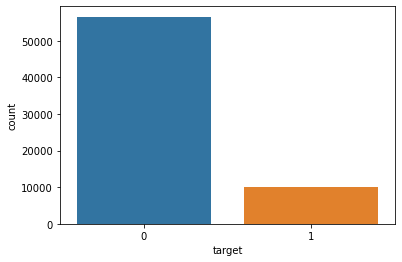

In [193]:
sns.countplot(y_train)

##### Oversampling

In [194]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy=0.5)
X_reshaped = X_train.values.reshape(-1, 1)  # Reshape feature data if required

X__train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


C:\Users\New user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

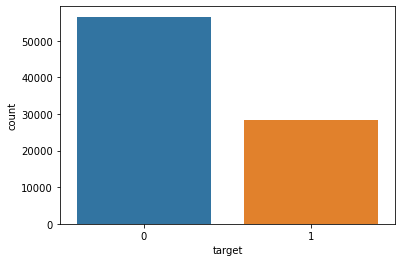

In [195]:
sns.countplot(y_train_resampled)

## Feature Selection

### RandomForest feature importances

In [196]:
rnd_clf = RandomForestClassifier(max_depth=3)
rnd_clf.fit(X__train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=3)

In [197]:
for name, score in zip(combined_df_copy.columns, rnd_clf.feature_importances_):
    print(name,score)

cpu_idle 0.0
cpu_iowait 0.0
cpu_system 0.016963132161391
cpu_total 0.0008019921577732992
cpu_user 1.3088426260953935e-05
diskio_sda1_read_bytes 0.0
diskio_sda1_write_bytes 0.0
diskio_sda_read_bytes 0.0
diskio_sda_write_bytes 0.0
fs_/_free 0.17904568017941672
fs_/_percent 0.004114432662025651
fs_/_size 0.14133610690602105
fs_/_used 0.007105808462164416
load_min1 0.007778772460698018
load_min15 4.982251602683485e-05
load_min5 0.009424246902826382
mem_active 0.06322248797862219
mem_available 0.11056330123518485
mem_buffers 0.0003572131666876771
mem_cached 0.1163615182694024
mem_free 0.06275668163898267
mem_inactive 0.00013576664756674206
mem_percent 0.07727044247083896
mem_used 0.018295546600420893
memswap_free 0.15086111579238107
memswap_sin 0.0
network_lo_cumulative_cx 0.0008316503029342088
network_lo_cumulative_rx 5.812770306687163e-05
network_lo_cumulative_tx 0.0
percpu_0_idle 0.0037926598920223205
percpu_0_iowait 0.0
percpu_0_nice 0.0
percpu_0_softirq 2.639200122908365e-06
percpu_0_s

#### Features that are important are:

1. CPU_System
2. fs_/_ free
3. fs_/_ size
4. mem_active
5. mem_available
6. mem_cached
7. mem_free
8. mem_used
9. mem_percent
10. memswap_free
11. processcount_sleeping
12. processcount_total

#### RFECV Wrapper

In [198]:
scaler = StandardScaler()
X_train_z_score = scaler.fit_transform(X_train)
X_test_z_score = scaler.transform(X_test)
X_train_z_scaler = pd.DataFrame(X_train_z_score,columns= X_train.columns)
X_test_z_scaler = pd.DataFrame(X_test_z_score,columns= X_train.columns)

In [199]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
kfold= StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
def wrapper_select_features(X_train, y_train, X_test, estimator, step, min_features_to_select):
    # configure to select all features
    rfe = RFECV(estimator=estimator, step=step, cv=kfold,min_features_to_select=min_features_to_select, scoring='f1', verbose=2, n_jobs=1)
    rfe.fit(X_train, y_train)
    # transform train input data
    X_train_rfe = rfe.transform(X_train)
    # transform test input data
    X_test_rfe= rfe.transform(X_test)
    return X_train_rfe, X_test_rfe, rfe

In [200]:
%%capture
estimator_lr = LogisticRegression()
min_features_to_select = 6
step_rfe = 1
X_train_fs_z_scaler, X_test_fs_z_scaler, rfe = wrapper_select_features(X_train_z_scaler, y_train,
                                                                       X_test_z_scaler, estimator_lr, step=step_rfe,
                                                     min_features_to_select=min_features_to_select)

In [201]:
print('Optimal number of features:', rfe.n_features_)
pd.DataFrame(X_train.columns[rfe.ranking_ == 1], columns=['Best features'])

Optimal number of features: 6


,Best features
0,fs_/_free
1,fs_/_size
2,mem_cached
3,mem_free
4,memswap_free
5,processcount_sleeping


In [202]:
selected_columns = ['fs_/_free','fs_/_size', 'mem_cached','mem_free','memswap_free', 'processcount_sleeping']
sdata = combined_df_copy[selected_columns]

In [ ]:
X[]

In [176]:
scaler = StandardScaler()
sdata_norm = scaler.fit_transform(sdata)
sdata_norm_df = pd.DataFrame(sdata_norm,columns= sdata.columns)

#### Correlation matrix

<AxesSubplot:>

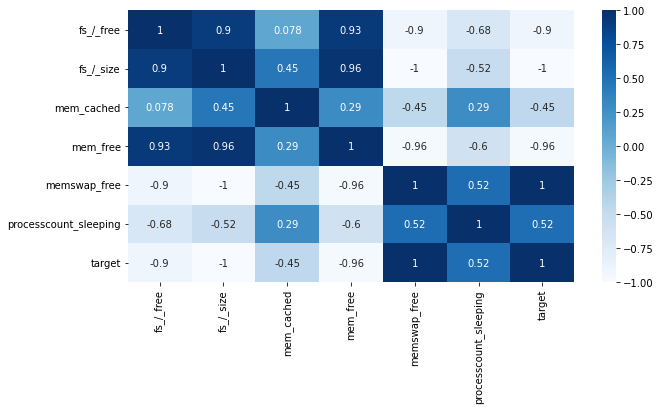

In [177]:
corr = sdata_norm_df.corr()
figure = plt.figure(figsize=(10, 5))
plt.tight_layout()
plt.xlabel('Corr')
sns.heatmap(corr, cmap="Blues", annot=True)

## XGBOOST MODEL

In [203]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
      cm (array, shape = [n, n]): a confusion matrix of integer classes
      class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [204]:
X_train_s = X_train_z_scaler[selected_columns]
X_test_s = X_test_z_scaler[selected_columns]

In [205]:
%%capture
estimator_xgb = XGBClassifier(verbosity=2,   max_bin=255, predictor='cpu_predictor' )
estimator_xgb.fit(X_train_s, y_train)

Accuracy  classifier on test set: 1.0000
              precision    recall  f1-score   support

      benign     1.0000    1.0000    1.0000     24258
      malign     1.0000    1.0000    1.0000      4335

    accuracy                         1.0000     28593
   macro avg     1.0000    1.0000    1.0000     28593
weighted avg     1.0000    1.0000    1.0000     28593

[[24258     0]
 [    0  4335]]


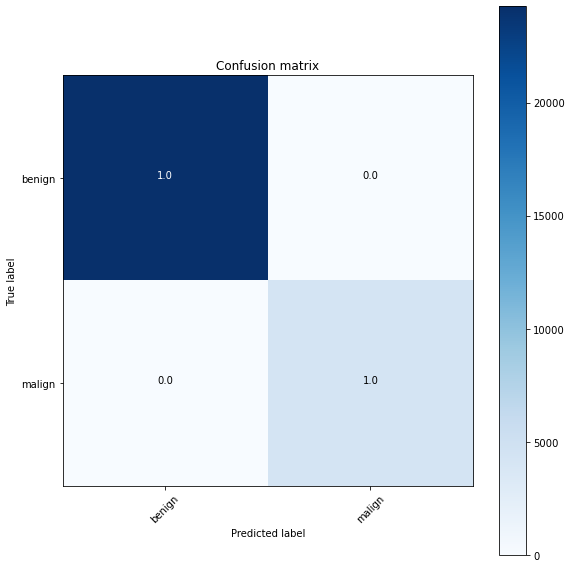

In [206]:
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_xgb.score(X_test_s, y_test)))

y_pred = estimator_xgb.predict(X_test_s)

print(classification_report(y_test, y_pred,target_names=['benign', 'malign'], digits=4)) 
cm = confusion_matrix(y_test, y_pred)
print(cm)
target_list = ['benign', 'malign']
figure = plot_confusion_matrix(cm, target_list)